In [1]:
import numpy as np 
import pandas as pd 
import pandasql as ps
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ucl-202122-uefa-champions-league/defending.csv
/kaggle/input/ucl-202122-uefa-champions-league/key_stats.csv
/kaggle/input/ucl-202122-uefa-champions-league/attacking.csv
/kaggle/input/ucl-202122-uefa-champions-league/goalkeeping.csv
/kaggle/input/ucl-202122-uefa-champions-league/disciplinary.csv
/kaggle/input/ucl-202122-uefa-champions-league/goals.csv
/kaggle/input/ucl-202122-uefa-champions-league/attempts.csv
/kaggle/input/ucl-202122-uefa-champions-league/distributon.csv


In [3]:
plt.style.use(plt.style.available[14])

In [4]:
defending = pd.read_csv('/kaggle/input/ucl-202122-uefa-champions-league/defending.csv')
key_stats = pd.read_csv('/kaggle/input/ucl-202122-uefa-champions-league/key_stats.csv')
attacking = pd.read_csv('/kaggle/input/ucl-202122-uefa-champions-league/attacking.csv')
goalkeeping = pd.read_csv('/kaggle/input/ucl-202122-uefa-champions-league/goalkeeping.csv')
disciplinary = pd.read_csv('/kaggle/input/ucl-202122-uefa-champions-league/disciplinary.csv')
goals = pd.read_csv('/kaggle/input/ucl-202122-uefa-champions-league/goals.csv')
attempts = pd.read_csv('/kaggle/input/ucl-202122-uefa-champions-league/attempts.csv')
distributon = pd.read_csv('/kaggle/input/ucl-202122-uefa-champions-league/distributon.csv')

In [5]:
defending.head()

,serial,player_name,club,position,balls_recoverd,tackles,t_won,t_lost,clearance_attempted,match_played
0,1,Casemiro,Real Madrid,Midfielder,76,31,13,18,19,11
1,1,Éder Militão,Real Madrid,Defender,76,19,6,13,32,12
2,1,Reinildo,Atlético,Defender,76,13,6,7,20,10
3,4,Fabinho,Liverpool,Midfielder,74,23,9,14,8,13
4,5,Albiol,Villarreal,Defender,73,9,6,3,62,12


In [6]:
key_stats.head()

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered
0,Courtois,Real Madrid,Goalkeeper,1230,13,0,0,64.2
1,Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0
2,Benzema,Real Madrid,Forward,1106,12,15,1,121.5
3,Modrić,Real Madrid,Midfielder,1077,13,0,4,124.5
4,Éder Militão,Real Madrid,Defender,1076,12,0,0,110.4


In [7]:
attacking.head()

,serial,player_name,club,position,assists,corner_taken,offsides,dribbles,match_played
0,1,Bruno Fernandes,Man. United,Midfielder,7,10,2,7,7
1,2,Vinícius Júnior,Real Madrid,Forward,6,3,4,83,13
2,2,Sané,Bayern,Midfielder,6,3,3,32,10
3,4,Antony,Ajax,Forward,5,3,4,28,7
4,5,Alexander-Arnold,Liverpool,Defender,4,36,0,9,9


In [8]:
goalkeeping.head()

,serial,player_name,club,position,saved,conceded,saved_penalties,cleansheets,punches made,match_played
0,1,Courtois,Real Madrid,Goalkeeper,61,14,1,5,4,13
1,2,Rulli,Villarreal,Goalkeeper,41,16,0,3,12,12
2,3,Vlachodimos,Benfica,Goalkeeper,38,17,1,5,5,10
3,4,Athanasiadis,Sheriff,Goalkeeper,29,8,0,1,2,5
4,5,Mignolet,Club Brugge,Goalkeeper,28,20,0,0,1,6


In [9]:
disciplinary.head()

,serial,player_name,club,position,fouls_committed,fouls_suffered,red,yellow,minutes_played,match_played
0,1,João Palhinha,Sporting CP,Midfielder,23,17,2,0,534,6
1,2,Capoue,Villarreal,Midfielder,19,17,3,1,1046,12
2,2,Rodri,Man. City,Midfielder,19,4,2,0,842,10
3,2,Seiwald,Salzburg,Midfielder,19,3,2,0,649,8
4,5,Balanta,Club Brugge,Midfielder,18,3,4,0,407,5


In [10]:
goals.head()

,serial,player_name,club,position,goals,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,match_played
0,1,Benzema,Real Madrid,Forward,15,11,1,3,0,13,2,3,12
1,2,Lewandowski,Bayern,Forward,13,8,3,1,1,13,0,3,10
2,3,Haller,Ajax,Forward,11,3,4,3,1,11,0,1,8
3,4,Salah,Liverpool,Forward,8,0,8,0,0,7,1,1,13
4,5,Nkunku,Leipzig,Midfielder,7,3,1,3,0,7,0,0,6


In [11]:
attempts.head()

,serial,player_name,club,position,total_attempts,on_target,off_target,blocked,match_played
0,1,Benzema,Real Madrid,Forward,45,23,13,9,12
1,2,Salah,Liverpool,Forward,42,22,11,9,13
2,3,Mahrez,Man. City,Midfielder,37,18,8,11,12
3,4,Sané,Bayern,Midfielder,33,13,12,8,10
4,5,Lewandowski,Bayern,Forward,31,19,8,4,10


In [12]:
distributon.head()

,serial,player_name,club,position,pass_accuracy,pass_attempted,pass_completed,cross_accuracy,cross_attempted,cross_complted,freekicks_taken,match_played
0,1,Erokhin,Zenit,Midfielder,98.0,27,26,0,2,0,0,6
1,2,Eric García,Barcelona,Defender,97.5,203,197,0,0,0,1,4
2,3,Ulreich,Bayern,Goalkeeper,97.0,32,31,0,0,0,1,1
3,4,Rugani,Juventus,Defender,96.8,130,122,0,0,0,0,4
4,5,J. Timber,Ajax,Midfielder,95.8,497,474,0,1,0,14,8


In [13]:
query = """
SELECT 
    key_stats.player_name,
    key_stats.club,
    key_stats.position,
    key_stats.minutes_played,
    key_stats.match_played,
    key_stats.goals,
    key_stats.assists,
    CAST(REPLACE(key_stats.distance_covered,'-',0) AS FLOAT) AS distance_covered,
    goalkeeping.conceded,
    defending.balls_recoverd,
    defending.tackles,
    defending.t_won,
    defending.t_lost,
    defending.clearance_attempted,
    attacking.corner_taken,
    attacking.offsides,
    attacking.dribbles,
    disciplinary.fouls_committed,
    disciplinary.fouls_suffered,
    disciplinary.red AS yellow,
    disciplinary.yellow AS red,
    goals.right_foot,
    goals.left_foot,
    goals.headers,
    goals.others,
    goals.inside_area,
    goals.outside_areas,
    goals.penalties,
    attempts.total_attempts,
    attempts.on_target,
    attempts.off_target,
    CAST(attempts.on_target AS FLOAT) / CAST(attempts.total_attempts AS FLOAT) AS on_target_rate,
    attempts.blocked,
    distributon.pass_accuracy,
    distributon.pass_attempted,
    distributon.pass_completed,
    distributon.cross_accuracy,
    distributon.cross_attempted,
    distributon.cross_complted,
    distributon.freekicks_taken
FROM
    key_stats
LEFT JOIN 
    defending
ON 
    (key_stats.player_name = defending.player_name AND key_stats.club = defending.club)
LEFT JOIN 
    attacking
ON 
    (key_stats.player_name = attacking.player_name AND key_stats.club = attacking.club)
LEFT JOIN 
    disciplinary
ON 
    (key_stats.player_name = disciplinary.player_name AND key_stats.club = disciplinary.club)
LEFT JOIN 
    goals
ON 
    (key_stats.player_name = goals.player_name AND key_stats.club = goals.club)
LEFT JOIN 
    attempts
ON 
    (key_stats.player_name = attempts.player_name AND key_stats.club = attempts.club)
LEFT JOIN 
    distributon
ON 
    (key_stats.player_name = distributon.player_name AND key_stats.club = distributon.club)
LEFT JOIN 
    goalkeeping
ON 
    (key_stats.player_name = goalkeeping.player_name AND key_stats.club = goalkeeping.club)
"""
df = ps.sqldf(query, locals())

In [14]:
df.head()

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered,conceded,balls_recoverd,...,off_target,on_target_rate,blocked,pass_accuracy,pass_attempted,pass_completed,cross_accuracy,cross_attempted,cross_complted,freekicks_taken
0,Courtois,Real Madrid,Goalkeeper,1230,13,0,0,64.2,14.0,NaN,...,NaN,NaN,NaN,76.7,483.0,365.0,0.0,0.0,0.0,27.0
1,Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0,NaN,29.0,...,10.0,0.296296,9.0,83.1,451.0,377.0,31.0,19.0,6.0,0.0
2,Benzema,Real Madrid,Forward,1106,12,15,1,121.5,NaN,6.0,...,13.0,0.511111,9.0,83.1,523.0,433.0,20.0,10.0,2.0,4.0
3,Modrić,Real Madrid,Midfielder,1077,13,0,4,124.5,NaN,39.0,...,3.0,0.357143,6.0,89.8,799.0,723.0,25.0,12.0,3.0,26.0
4,Éder Militão,Real Madrid,Defender,1076,12,0,0,110.4,NaN,76.0,...,5.0,0.444444,0.0,87.5,643.0,563.0,0.0,2.0,0.0,17.0


In [15]:
#plt.figure(figsize=(19,10))
data = df[["player_name","club","position","goals","right_foot","left_foot","headers","others","inside_area","outside_areas","penalties"]]
print("Total Goals", data["inside_area"].sum() + data["outside_areas"].sum())
print("---------------------------------------------------")
print("Inside Area","%",100*(data["inside_area"].sum() / (data["inside_area"].sum() + data["outside_areas"].sum())))
print("Outside Area","%",100*(data["outside_areas"].sum() / (data["inside_area"].sum() + data["outside_areas"].sum())))
print("---------------------------------------------------")
print("Right Foot","%",100*(data["right_foot"].sum() / (data["inside_area"].sum() + data["outside_areas"].sum())))
print("Left Foot","%",100*(data["left_foot"].sum() / (data["inside_area"].sum() + data["outside_areas"].sum())))
print("Headers","%",100*(data["headers"].sum() / (data["inside_area"].sum() + data["outside_areas"].sum())))
print("Others","%",100*(data["others"].sum() / (data["inside_area"].sum() + data["outside_areas"].sum())))
print("---------------------------------------------------")
print("Penalties","%",100*(data["penalties"].sum() / (data["inside_area"].sum() + data["outside_areas"].sum())))
print("Not Penalties","%",100-100*(data["penalties"].sum() / (data["inside_area"].sum() + data["outside_areas"].sum())))

Total Goals 370.0
---------------------------------------------------
Inside Area % 89.72972972972974
Outside Area % 10.27027027027027
---------------------------------------------------
Right Foot % 48.10810810810811
Left Foot % 34.32432432432432
Headers % 16.216216216216218
Others % 1.0810810810810811
---------------------------------------------------
Penalties % 9.72972972972973
Not Penalties % 90.27027027027027


In [16]:
df[["player_name","goals"]].sort_values("goals",ascending=False).reset_index(drop=True).head(20).style.background_gradient("Greens")

,player_name,goals
0,Benzema,15
1,Lewandowski,13
2,Haller,11
3,Salah,8
4,Nkunku,7
5,Mahrez,7
6,Ronaldo,6
7,Núñez,6
8,Mbappé,6
9,Sané,6


In [17]:
df[["player_name","assists"]].sort_values("assists",ascending=False).reset_index(drop=True).head(20).style.background_gradient("Greens")

,player_name,assists
0,Bruno Fernandes,7
1,Vinícius Júnior,6
2,Sané,6
3,Antony,5
4,Mbappé,4
5,Modrić,4
6,João Mário,4
7,Alexander-Arnold,4
8,De Bruyne,4
9,Capoue,4


In [18]:
df.groupby(["position"])["goals"].sum().reset_index().sort_values("goals",ascending=False).style.background_gradient("Greens")

,position,goals
1,Forward,195
3,Midfielder,138
0,Defender,35
2,Goalkeeper,0


In [19]:
df.groupby(["club"])["goals"].sum().reset_index().sort_values(["goals"],ascending=False).reset_index(drop=True).style.background_gradient("Greens")

,club,goals
0,Bayern,30
1,Real Madrid,28
2,Man. City,28
3,Liverpool,28
4,Ajax,21
5,Chelsea,21
6,Villarreal,20
7,Paris,15
8,Leipzig,15
9,Sporting CP,14


In [20]:
df.groupby(["club"])["conceded"].sum().astype("int32").reset_index().sort_values(["conceded"],ascending=False).reset_index(drop=True).style.background_gradient("Reds")

,club,conceded
0,Club Brugge,20
1,Beşiktaş,19
2,Benfica,17
3,Sporting CP,17
4,Villarreal,16
5,Man. City,16
6,Malmö,14
7,Leipzig,14
8,Real Madrid,14
9,Liverpool,14


In [21]:
df.groupby(["position"])["assists"].sum().reset_index().sort_values("assists",ascending=False).style.background_gradient("Greens")

,position,assists
3,Midfielder,130
1,Forward,81
0,Defender,69
2,Goalkeeper,1


In [22]:
df.query("position=='Goalkeeper' & assists > 0")[["player_name","assists"]]

,player_name,assists
73,Neuer,1


In [23]:
df[["player_name","minutes_played","match_played"]].sort_values("minutes_played",ascending=False).reset_index(drop=True).head(20).style.background_gradient("Greens")

,player_name,minutes_played,match_played
0,Courtois,1230,13
1,Vinícius Júnior,1199,13
2,Alisson Becker,1170,13
3,Benzema,1106,12
4,Pau Torres,1080,12
5,Rulli,1080,12
6,Modrić,1077,13
7,Éder Militão,1076,12
8,Parejo,1055,12
9,Capoue,1046,12


In [24]:
df[["player_name","red"]].sort_values("red",ascending=False).reset_index(drop=True).head(20).style.background_gradient("Reds")

,player_name,red
0,Felipe,2.000000
1,Ahmedhodžić,1.000000
2,Barella,1.000000
3,Guilavogui,1.000000
4,Brooks,1.000000
5,Alexis Sánchez,1.000000
6,Jordán,1.000000
7,Angeliño,1.000000
8,Eric García,1.000000
9,En-Nesyri,1.000000


In [25]:
df[["player_name","yellow"]].sort_values("yellow",ascending=False).reset_index(drop=True).head(20).style.background_gradient("Wistia_r")

,player_name,yellow
0,Ikoné,4.000000
1,Éder Militão,4.000000
2,Álvarez,4.000000
3,Adams,4.000000
4,Guilavogui,4.000000
5,Balanta,4.000000
6,Kimpembe,3.000000
7,En-Nesyri,3.000000
8,Marcos Llorente,3.000000
9,Arnold,3.000000


In [26]:
df[["player_name","pass_accuracy","pass_attempted"]].sort_values(["pass_attempted"],ascending=False).reset_index(drop=True).head(20).style.background_gradient("Greens")

,player_name,pass_accuracy,pass_attempted
0,Kroos,91.900000,814.000000
1,Rodri,94.200000,806.000000
2,Modrić,89.800000,799.000000
3,Rüdiger,90.300000,750.000000
4,Laporte,94.700000,707.000000
5,Kimmich,89.500000,688.000000
6,Alexander-Arnold,80.000000,685.000000
7,Pavard,90.200000,676.000000
8,Martínez,94.100000,674.000000
9,João Cancelo,88.000000,668.000000


In [27]:
df.groupby(["position"])["pass_accuracy"].mean().sort_values(ascending=False).reset_index().style.background_gradient("Greens")

,position,pass_accuracy
0,Defender,83.855450
1,Midfielder,82.109692
2,Goalkeeper,77.092000
3,Forward,74.905833


In [28]:
df.groupby(["club"])["pass_accuracy"].mean().reset_index().sort_values(["pass_accuracy"],ascending=False).reset_index(drop=True).style.background_gradient("Greens")

,club,pass_accuracy
0,Man. City,89.180000
1,Bayern,87.531579
2,Shakhtar Donetsk,86.935000
3,Barcelona,86.825000
4,Paris,86.061111
5,Real Madrid,85.838889
6,Chelsea,85.825000
7,Ajax,85.456250
8,Juventus,84.745000
9,Zenit,83.905882


In [29]:
df[["player_name","total_attempts","on_target_rate"]].sort_values(["total_attempts"],ascending=False).reset_index(drop=True).head(20).style.background_gradient("Greens")

,player_name,total_attempts,on_target_rate
0,Benzema,45.000000,0.511111
1,Salah,42.000000,0.523810
2,Mahrez,37.000000,0.486486
3,Sané,33.000000,0.393939
4,Lewandowski,31.000000,0.612903
5,Martínez,28.000000,0.250000
6,Vinícius Júnior,27.000000,0.296296
7,Mbappé,27.000000,0.592593
8,Havertz,26.000000,0.423077
9,Antony,26.000000,0.384615


In [30]:
df.groupby(["club"]).agg({"cross_accuracy":"mean"}).reset_index().sort_values(["cross_accuracy"],ascending=False).reset_index(drop=True).style.background_gradient("Greens")

,club,cross_accuracy
0,Chelsea,28.958333
1,Milan,22.750000
2,Sevilla,22.611111
3,Atalanta,22.222222
4,Dortmund,21.947368
5,Zenit,21.529412
6,Inter,20.736842
7,Leipzig,20.611111
8,Club Brugge,19.933333
9,Real Madrid,19.333333


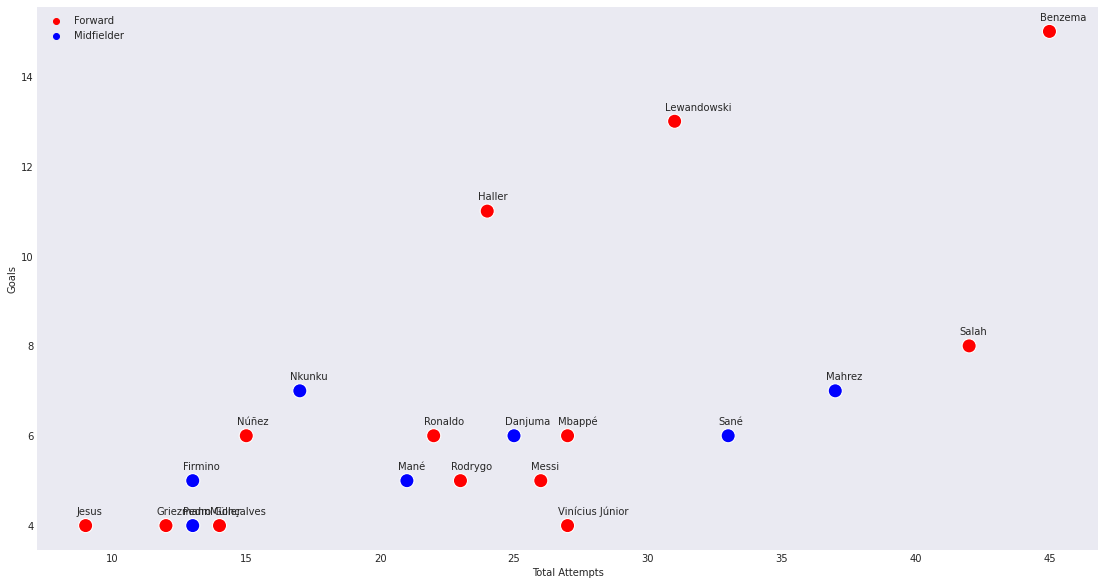

In [31]:
plt.figure(figsize=(19,10))
data = df[["player_name","club","position","total_attempts","goals"]].sort_values(["goals"],ascending=False).reset_index(drop=True).head(20)
sns.scatterplot(data = data,
               x = 'total_attempts',
               y = 'goals',
               hue="position",s=200, palette=["red","blue"])
for i in range(len(data)):
    if data["player_name"][i] == 'Foden':
        plt.text(x=data["total_attempts"][i]-0.35, y = data["goals"][i]-0.40, s = data["player_name"][i])
    else:
        plt.text(x=data["total_attempts"][i]-0.35, y = data["goals"][i]+0.25, s = data["player_name"][i])
plt.legend()
plt.xlabel("Total Attempts")
plt.ylabel("Goals")
plt.show()

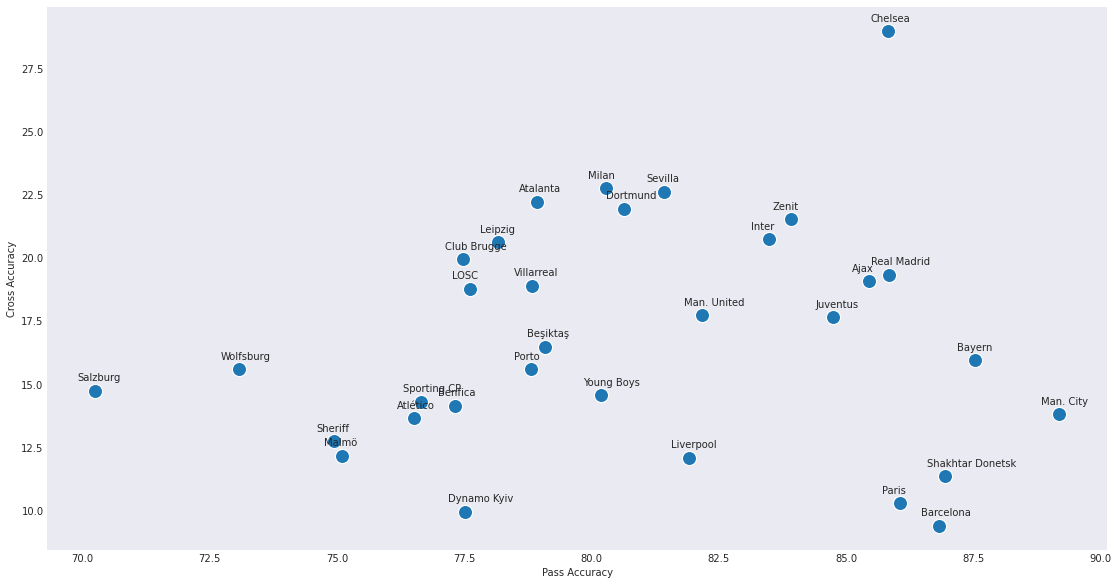

In [32]:
plt.figure(figsize=(19,10))
data = df.groupby(["club"]).agg({"pass_accuracy":"mean","cross_accuracy":"mean"}).reset_index().sort_values(["cross_accuracy"],ascending=False).reset_index(drop=True)
sns.scatterplot(data = data,
               x = 'pass_accuracy',
               y = 'cross_accuracy',s=200)
for i in range(len(data)):
    plt.text(x=data["pass_accuracy"][i]-0.35, y = data["cross_accuracy"][i]+0.40, s = data["club"][i])
plt.legend()
plt.xlabel("Pass Accuracy")
plt.ylabel("Cross Accuracy")
plt.show()

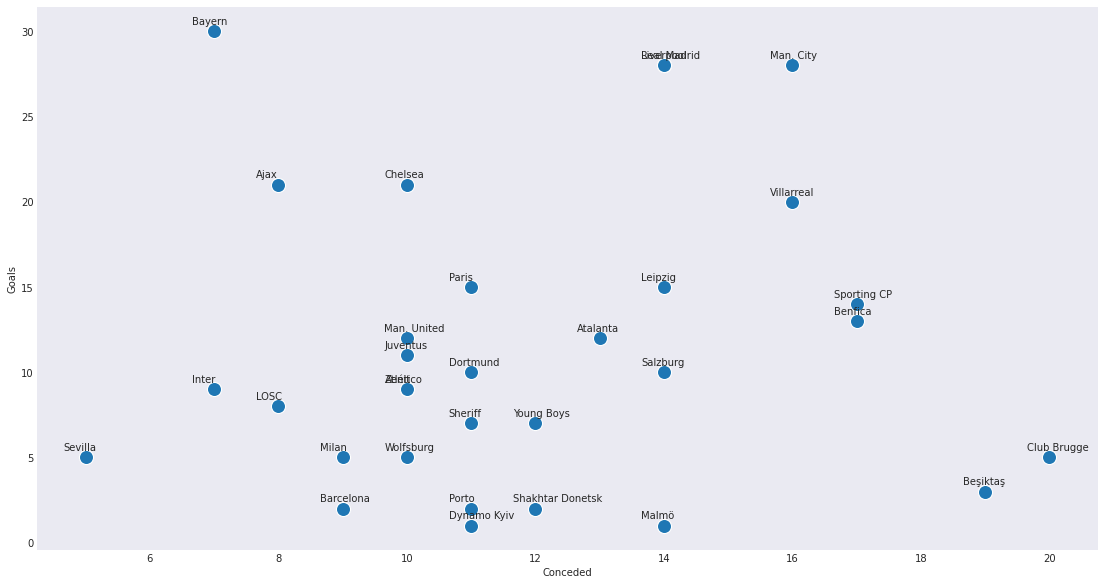

In [33]:
plt.figure(figsize=(19,10))
data = df.groupby(["club"]).agg({"conceded":"sum","goals":"sum"}).reset_index()
sns.scatterplot(data = data,
               x = 'conceded',
               y = 'goals',s=200)
for i in range(len(data)):
    plt.text(x=data["conceded"][i]-0.35, y = data["goals"][i]+0.40, s = data["club"][i])
plt.legend()
plt.xlabel("Conceded")
plt.ylabel("Goals")
plt.show()

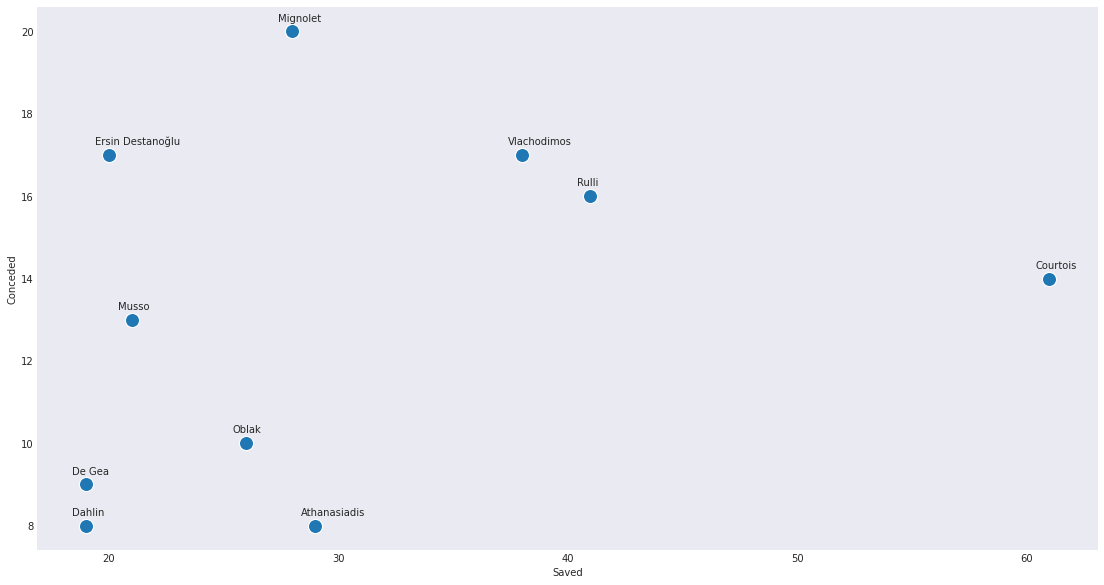

In [34]:
plt.figure(figsize=(19,10))
data = goalkeeping[["player_name","saved","conceded"]].sort_values("saved",ascending=False).head(10)
sns.scatterplot(data = data,
               x = 'saved',
               y = 'conceded',s=200)
for i in range(len(data)):
    plt.text(x=data["saved"][i]-0.60, y = data["conceded"][i]+0.25, s = data["player_name"][i])
plt.legend()
plt.xlabel("Saved")
plt.ylabel("Conceded")
plt.show()

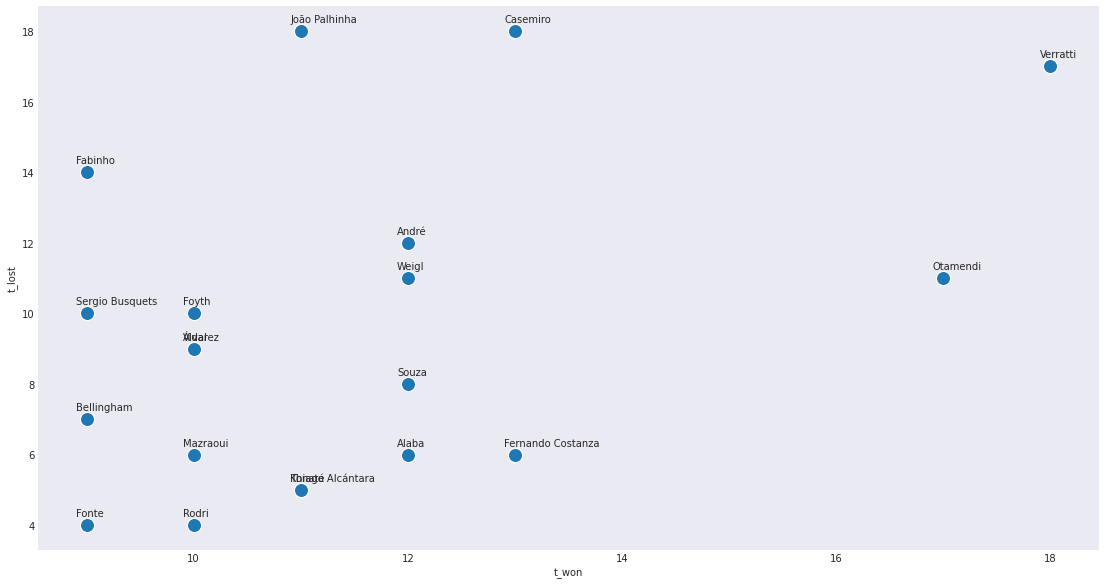

In [35]:
plt.figure(figsize=(19,10))
data = df[["player_name","club","position","t_won","t_lost"]].sort_values("t_won",ascending=False).reset_index(drop=True).head(20)
sns.scatterplot(data = data,
               x = 't_won',
               y = 't_lost',s=200)
for i in range(len(data)):
    plt.text(x=data["t_won"][i]-0.1, y = data["t_lost"][i]+0.25, s = data["player_name"][i])
plt.legend()
plt.xlabel("t_won")
plt.ylabel("t_lost")
plt.show()

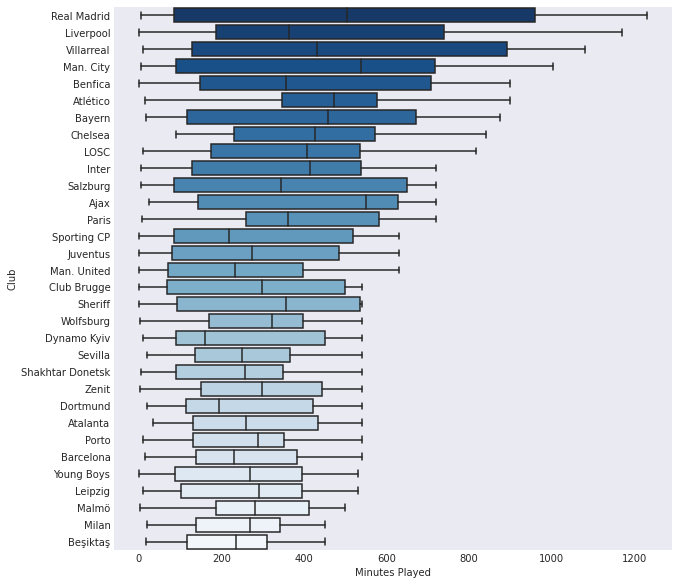

In [36]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df, y="club", x="minutes_played",palette="Blues_r")
plt.xlabel("Minutes Played")
plt.ylabel("Club")
plt.show()

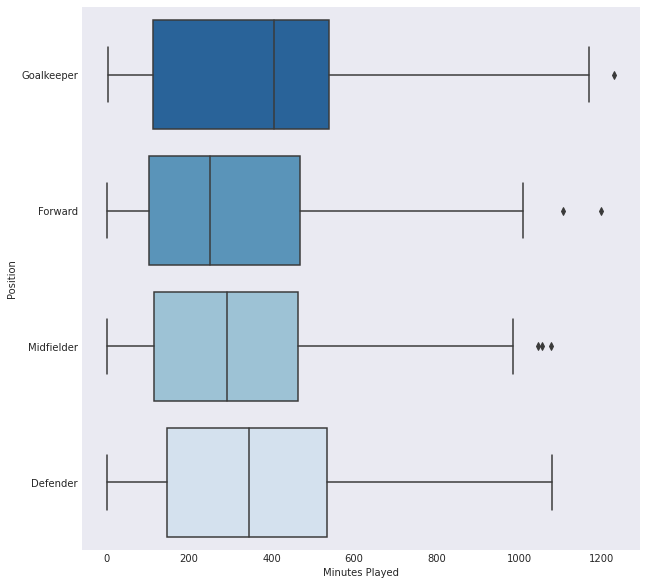

In [37]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df, y="position", x="minutes_played",palette="Blues_r")
plt.xlabel("Minutes Played")
plt.ylabel("Position")
plt.show()

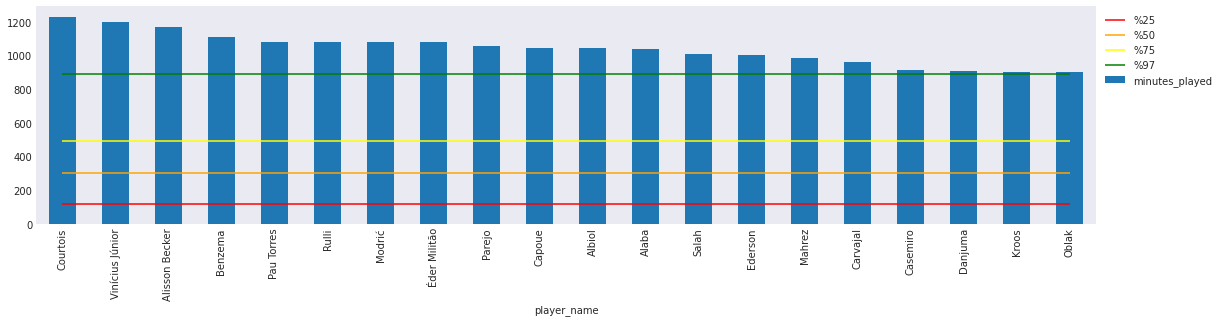

In [38]:
df[["player_name","minutes_played"]].sort_values("minutes_played",ascending=False).head(20).set_index("player_name").plot(kind="bar",figsize=(19,4),label="Minutes Played")
plt.hlines(y=df["minutes_played"].quantile(0.25), xmax=19, xmin=0, label="%25",color="red")
plt.hlines(y=df["minutes_played"].quantile(0.50), xmax=19, xmin=0, label="%50",color="orange")
plt.hlines(y=df["minutes_played"].quantile(0.75), xmax=19, xmin=0, label="%75",color="yellow")
plt.hlines(y=df["minutes_played"].quantile(0.97), xmax=19, xmin=0, label="%97",color="green")
plt.legend(bbox_to_anchor=(1, 1))

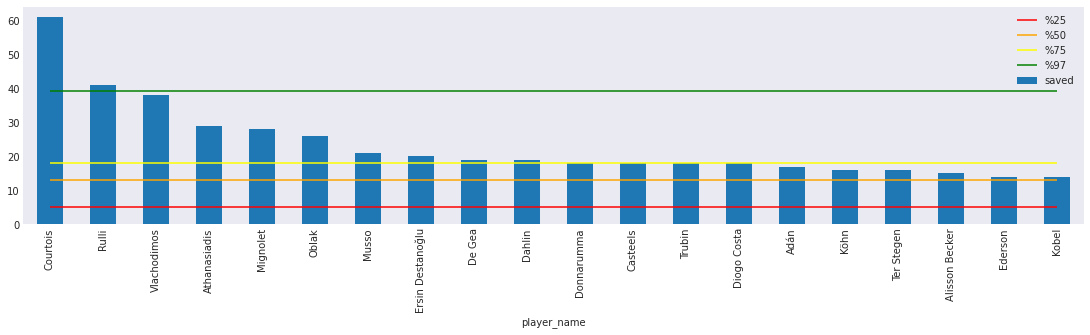

In [39]:
feature = "saved"
goalkeeping[["player_name",feature]].sort_values(feature,ascending=False).head(20).set_index("player_name").plot(kind="bar",figsize=(19,4),label="Minutes Played")
plt.hlines(y=goalkeeping[feature].quantile(0.25), xmax=19, xmin=0, label="%25",color="red")
plt.hlines(y=goalkeeping[feature].quantile(0.50), xmax=19, xmin=0, label="%50",color="orange")
plt.hlines(y=goalkeeping[feature].quantile(0.75), xmax=19, xmin=0, label="%75",color="yellow")
plt.hlines(y=goalkeeping[feature].quantile(0.97), xmax=19, xmin=0, label="%97",color="green")
plt.legend(bbox_to_anchor=(1, 1))

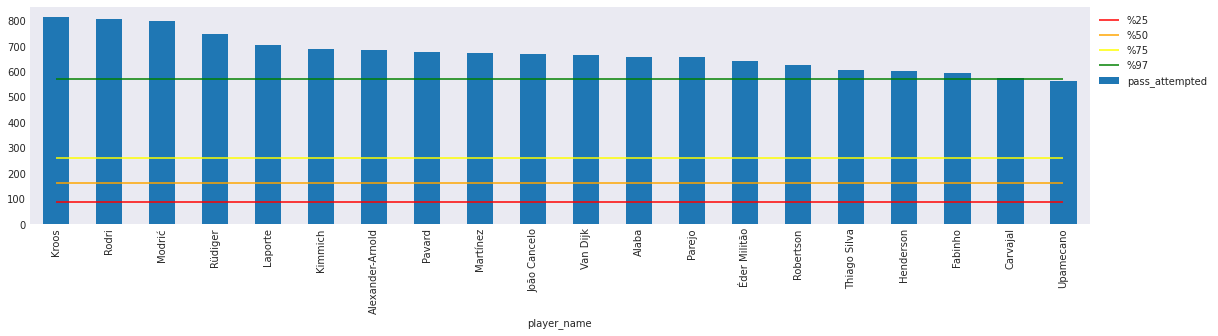

In [40]:
feature = "pass_attempted"
df[["player_name",feature]].sort_values(feature,ascending=False).head(20).set_index("player_name").plot(kind="bar",figsize=(19,4),label="Minutes Played")
plt.hlines(y=df[feature].quantile(0.25), xmax=19, xmin=0, label="%25",color="red")
plt.hlines(y=df[feature].quantile(0.50), xmax=19, xmin=0, label="%50",color="orange")
plt.hlines(y=df[feature].quantile(0.75), xmax=19, xmin=0, label="%75",color="yellow")
plt.hlines(y=df[feature].quantile(0.97), xmax=19, xmin=0, label="%97",color="green")
plt.legend(bbox_to_anchor=(1, 1))

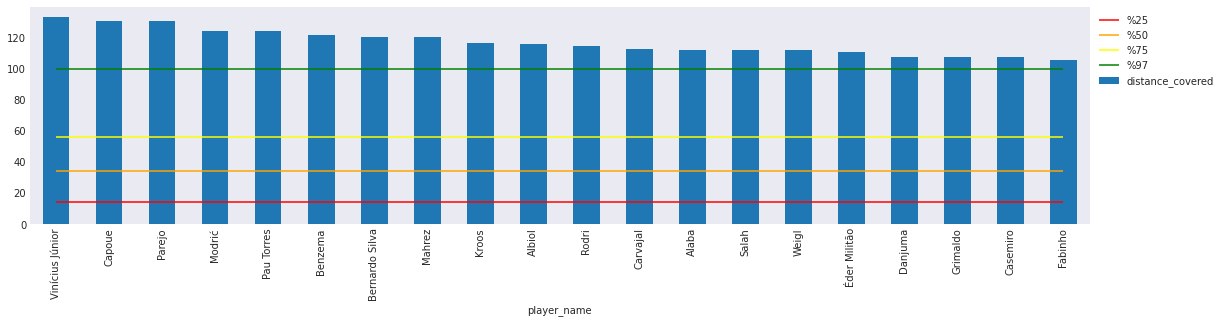

In [41]:
feature = "distance_covered"
df[["player_name","position",feature]].query("position!='Goalkeeper'").sort_values(feature,ascending=False).head(20).set_index("player_name").plot(kind="bar",figsize=(19,4),label="Minutes Played")
plt.hlines(y=df[feature].quantile(0.25), xmax=19, xmin=0, label="%25",color="red")
plt.hlines(y=df[feature].quantile(0.50), xmax=19, xmin=0, label="%50",color="orange")
plt.hlines(y=df[feature].quantile(0.75), xmax=19, xmin=0, label="%75",color="yellow")
plt.hlines(y=df[feature].quantile(0.97), xmax=19, xmin=0, label="%97",color="green")
plt.legend(bbox_to_anchor=(1, 1))

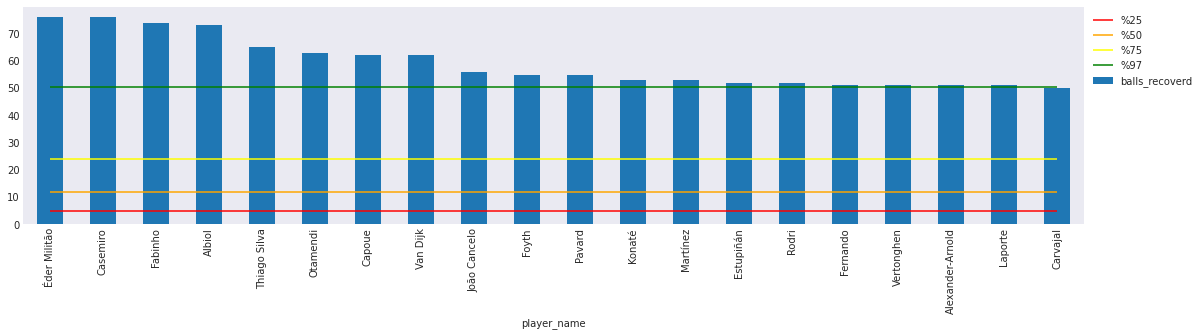

In [42]:
feature = "balls_recoverd"
df[["player_name",feature]].sort_values(feature,ascending=False).head(20).set_index("player_name").plot(kind="bar",figsize=(19,4),label="Minutes Played")
plt.hlines(y=df[feature].quantile(0.25), xmax=19, xmin=0, label="%25",color="red")
plt.hlines(y=df[feature].quantile(0.50), xmax=19, xmin=0, label="%50",color="orange")
plt.hlines(y=df[feature].quantile(0.75), xmax=19, xmin=0, label="%75",color="yellow")
plt.hlines(y=df[feature].quantile(0.97), xmax=19, xmin=0, label="%97",color="green")
plt.legend(bbox_to_anchor=(1, 1))

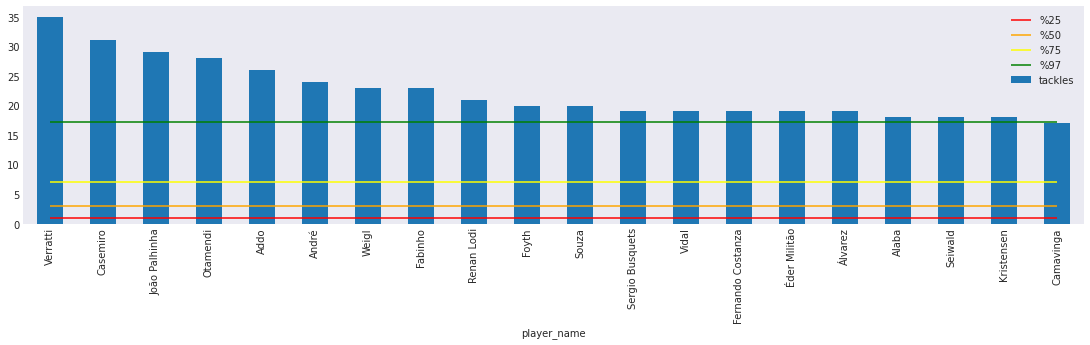

In [43]:
feature = "tackles"
df[["player_name",feature]].sort_values(feature,ascending=False).head(20).set_index("player_name").plot(kind="bar",figsize=(19,4),label="Minutes Played")
plt.hlines(y=df[feature].quantile(0.25), xmax=19, xmin=0, label="%25",color="red")
plt.hlines(y=df[feature].quantile(0.50), xmax=19, xmin=0, label="%50",color="orange")
plt.hlines(y=df[feature].quantile(0.75), xmax=19, xmin=0, label="%75",color="yellow")
plt.hlines(y=df[feature].quantile(0.97), xmax=19, xmin=0, label="%97",color="green")
plt.legend(bbox_to_anchor=(1, 1))

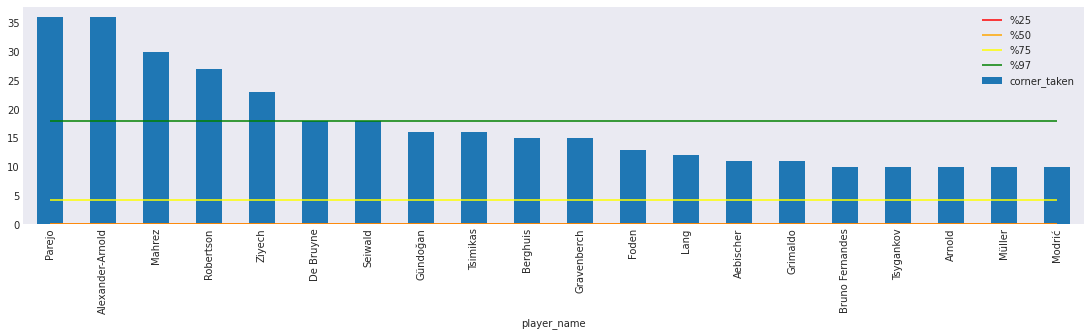

In [44]:
feature = "corner_taken"
df[["player_name",feature]].sort_values(feature,ascending=False).head(20).set_index("player_name").plot(kind="bar",figsize=(19,4),label="Minutes Played")
plt.hlines(y=df[feature].quantile(0.25), xmax=19, xmin=0, label="%25",color="red")
plt.hlines(y=df[feature].quantile(0.50), xmax=19, xmin=0, label="%50",color="orange")
plt.hlines(y=df[feature].quantile(0.75), xmax=19, xmin=0, label="%75",color="yellow")
plt.hlines(y=df[feature].quantile(0.97), xmax=19, xmin=0, label="%97",color="green")
plt.legend(bbox_to_anchor=(1, 1))

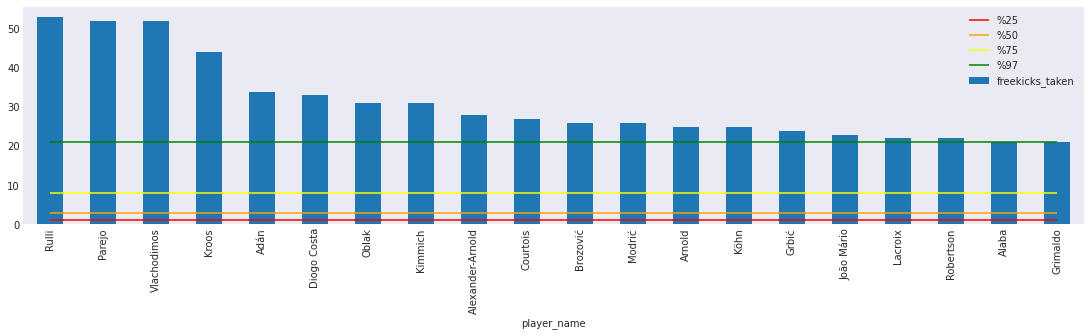

In [45]:
feature = "freekicks_taken"
df[["player_name",feature]].sort_values(feature,ascending=False).head(20).set_index("player_name").plot(kind="bar",figsize=(19,4),label="Minutes Played")
plt.hlines(y=df[feature].quantile(0.25), xmax=19, xmin=0, label="%25",color="red")
plt.hlines(y=df[feature].quantile(0.50), xmax=19, xmin=0, label="%50",color="orange")
plt.hlines(y=df[feature].quantile(0.75), xmax=19, xmin=0, label="%75",color="yellow")
plt.hlines(y=df[feature].quantile(0.97), xmax=19, xmin=0, label="%97",color="green")
plt.legend(bbox_to_anchor=(1, 1))

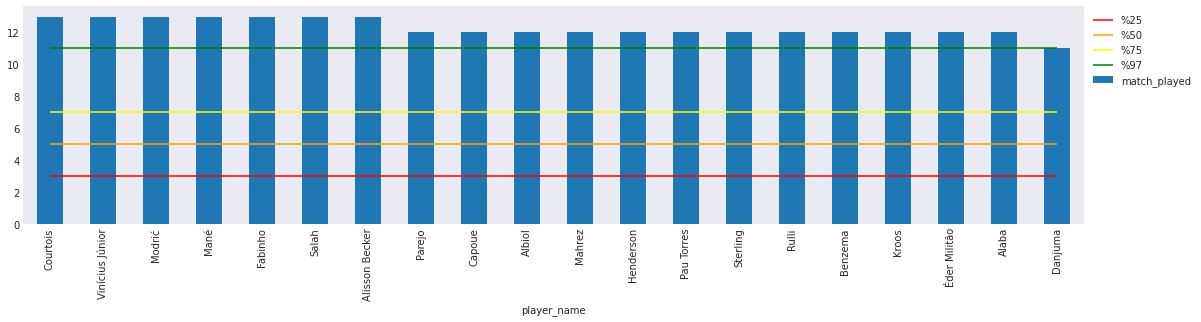

In [46]:
feature = "match_played"
df[["player_name",feature]].sort_values(feature,ascending=False).head(20).set_index("player_name").plot(kind="bar",figsize=(19,4),label="Minutes Played")
plt.hlines(y=df[feature].quantile(0.25), xmax=19, xmin=0, label="%25",color="red")
plt.hlines(y=df[feature].quantile(0.50), xmax=19, xmin=0, label="%50",color="orange")
plt.hlines(y=df[feature].quantile(0.75), xmax=19, xmin=0, label="%75",color="yellow")
plt.hlines(y=df[feature].quantile(0.97), xmax=19, xmin=0, label="%97",color="green")
plt.legend(bbox_to_anchor=(1, 1))